# Lending Club Case Study

**Business Objectives**

This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface.
 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). Credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulte. 

 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this castudy.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

**Results Expected**
  
Write all your code in one well-commented Python file; briefly mention the insights and observations from the analysis 

Present the overall approach of the analysis in a presentation: 
1. Mention the problem statement and the analysis approach briefly 
2. Explain the results of univariate, bivariate analysis etc. in business terms
3. Include visualisations and summarise the most important results in the presentation

In [3]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#read the dataset and check the first five rows
df = pd.read_csv("C:/Users/Shipra/Documents/caseStudy1/loan/loan.csv")
df.head()

C:\Users\Shipra\AppData\Local\Temp\ipykernel_92116\563318193.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/Shipra/Documents/caseStudy1/loan/loan.csv")


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
#check the shape of data frame
df.shape

(39717, 111)

# Data Handling and Cleaning

The first few steps involve making sure that there are no __missing values__ or __incorrect data types__ before we proceed to the analysis stage. These aforementioned problems are handled as follows:

 - For Missing Values: Some common techniques to treat this issue are
    - Dropping the rows containing the missing values
    - Deleting the duplicated entries
    - Imputing the missing values
    - Keep the missing values if they don't affect the analysis
 
    
 - Incorrect Data Types:
    - Clean certain values 
    - Clean and convert an entire column
 

In [6]:
#Check data types of all the columns of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


# Missing Value Treatment

In [7]:
#Check the number of null values in the columns
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [8]:
#Total Number of rows having all values as NULL
print(df.isnull().all(axis=1).sum())

0


In [9]:
#Total Number of columns having all values as NULL
print(df.isnull().all(axis=0).sum())

54


**Dropping the columns containing all NULL values**

In [10]:
# Drop all columns which have null values
df = df.dropna(axis=1, how='all')

#Check the shape of the data frame
df.shape

(39717, 57)

In [11]:
#Check the number of null values in the columns again
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12942
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [12]:
# Remove columns which have mostly null values
df.drop(columns=['desc', 'mths_since_last_delinq', 'mths_since_last_record','next_pymnt_d'], axis=1, inplace=True)
df.shape

(39717, 53)

In [13]:
#Columns with NULL Values
df.isnull().sum()

id                               0
member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_title                     2459
emp_length                    1075
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
url                              0
purpose                          0
title                           11
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec             

In [14]:
#Analyzing remaining columns to check if they can be dropped.
df.emp_title.value_counts()

emp_title
US Army                              134
Bank of America                      109
IBM                                   66
AT&T                                  59
Kaiser Permanente                     56
                                    ... 
Community College of Philadelphia      1
AMEC                                   1
lee county sheriff                     1
Bacon County Board of Education        1
Evergreen Center                       1
Name: count, Length: 28820, dtype: int64

In [15]:
#emp_title doesnt contain useful data for analysis, dropping the column
df.drop(columns=['emp_title'], axis=1, inplace=True)

In [16]:
df.emp_length.value_counts()

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

emp_length will be useful for analysis, so not dropping the column

**Dropping all other columns which will not be useful in analysis**

In [17]:
#Dropping below columns which will not be useful for analysis as these data are calculated after loan is approved.
df = df.drop(columns=['total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp'],axis=1)
df = df.drop(columns=['earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','delinq_2yrs'],axis=1)
df = df.drop(columns=['title','last_pymnt_d','last_pymnt_amnt','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_credit_pull_d','application_type'],axis=1)

In [18]:
#Dropping zipcode as it will not be useful for analysis
df = df.drop(columns=['zip_code'], axis=1)

In [19]:
#Dropping url as it will not be useful for analysis
df = df.drop(columns=['url'], axis=1)

In [20]:
df.shape

(39717, 28)

In [21]:
#Check columns which have very few unique values
print(df.nunique().sort_values(ascending=True))

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
loan_status                       3
pub_rec_bankruptcies              3
verification_status               3
home_ownership                    5
grade                             7
emp_length                       11
purpose                          14
sub_grade                        35
addr_state                       50
issue_d                          55
int_rate                        371
loan_amnt                       885
funded_amnt                    1041
dti                            2868
annual_inc                     5318
funded_amnt_inv                8205
installment                   15383
member_id                     39717
id                          

In [22]:
# Dropping columns which contain 1 unique value
df = df.loc[:,df.nunique()>1]
# Data frame shape after removing above columns
df.shape

(39717, 20)

# Fixing Null values for existing columns

In [23]:
#Columns with NULL Values
df.isnull().sum()

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1075
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
addr_state                 0
dti                        0
pub_rec_bankruptcies     697
dtype: int64

In [24]:
df.emp_length.value_counts()

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

In [25]:
#Since emp_length has 1075 NULL values, and its data represents number of years of employee tenure
#Its better to rows with NULL values to gain accuracy
df = df.dropna(subset=['emp_length'])
df.shape

(38642, 20)

In [26]:
df.pub_rec_bankruptcies.value_counts()

pub_rec_bankruptcies
0.0    36375
1.0     1563
2.0        7
Name: count, dtype: int64

# Univariate Analysis

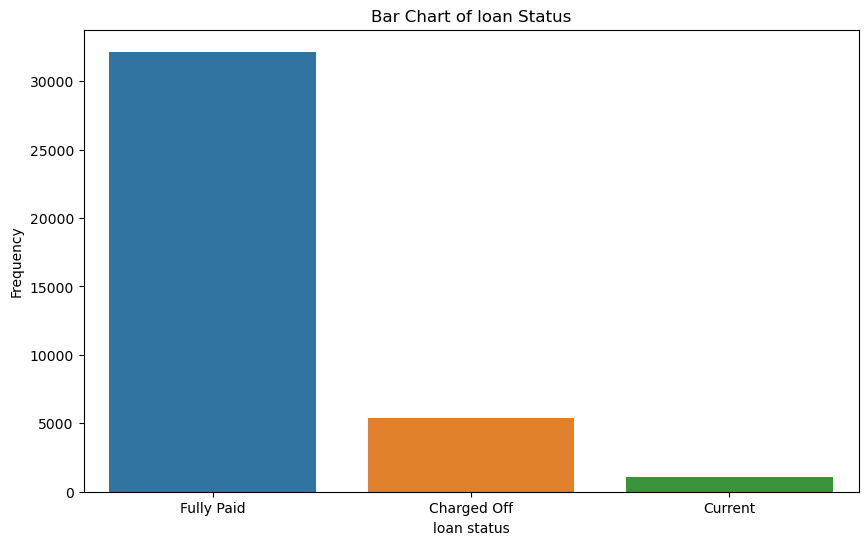

In [27]:
# Loan status analysis

# Plotting Bar Chart for status
plt.figure(figsize=(10, 6))
sns.countplot(x=(df['loan_status']))
plt.title('Bar Chart of loan Status')
plt.xlabel('loan status')
plt.ylabel('Frequency')
plt.show()

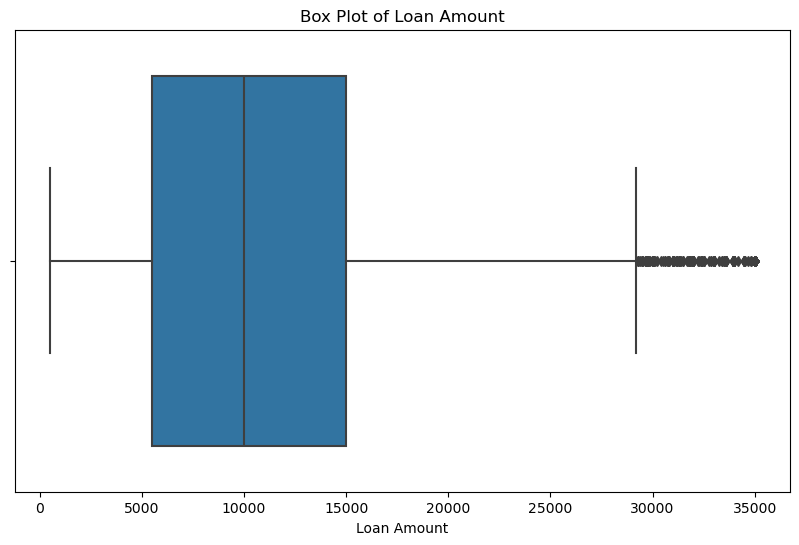

In [28]:
# Plotting Box Plot for loan_amnt
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['loan_amnt'])
plt.title('Box Plot of Loan Amount')
plt.xlabel('Loan Amount')
plt.show()

In [29]:
# Calculating wiskers to remove outliers
loan_amnt_q1=df.loan_amnt.quantile(0.25)
loan_amnt_q3=df.loan_amnt.quantile(0.75)
loan_amnt_iqr=loan_amnt_q3-loan_amnt_q1
loan_amnt_lower_wisk=loan_amnt_q1-1.5*loan_amnt_iqr
loan_amnt_higher_wisk=loan_amnt_q3+1.5*loan_amnt_iqr
print(loan_amnt_lower_wisk)
print(loan_amnt_higher_wisk)

-8750.0
29250.0


In [30]:
#clean the loan_amt column
df = df[df.loan_amnt < loan_amnt_higher_wisk]
df.shape

(37432, 20)

In [31]:
df.loan_amnt.describe()

count    37432.000000
mean     10588.256038
std       6442.767774
min        500.000000
25%       5375.000000
50%       9600.000000
75%      15000.000000
max      29175.000000
Name: loan_amnt, dtype: float64

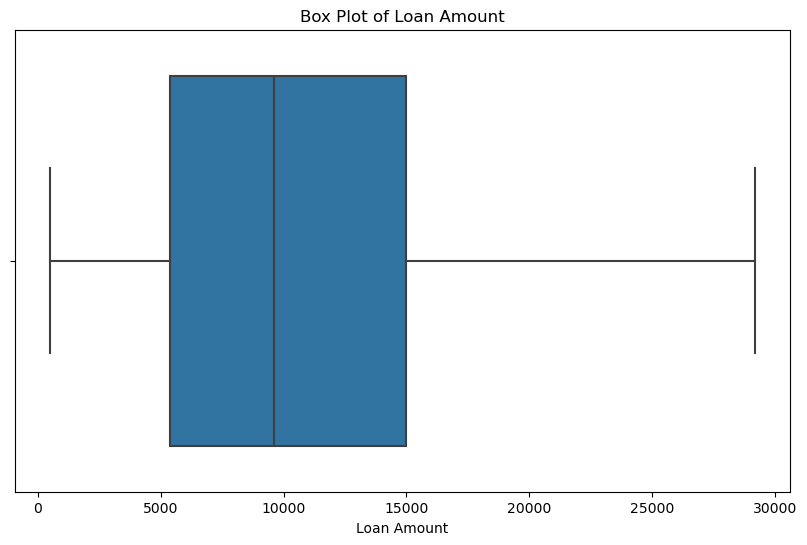

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['loan_amnt'])
plt.title('Box Plot of Loan Amount')
plt.xlabel('Loan Amount')
plt.show()

In [33]:
# Removing % from int_rate 
df['int_rate'] = df['int_rate'].apply(lambda x: float(x.rstrip('%')))

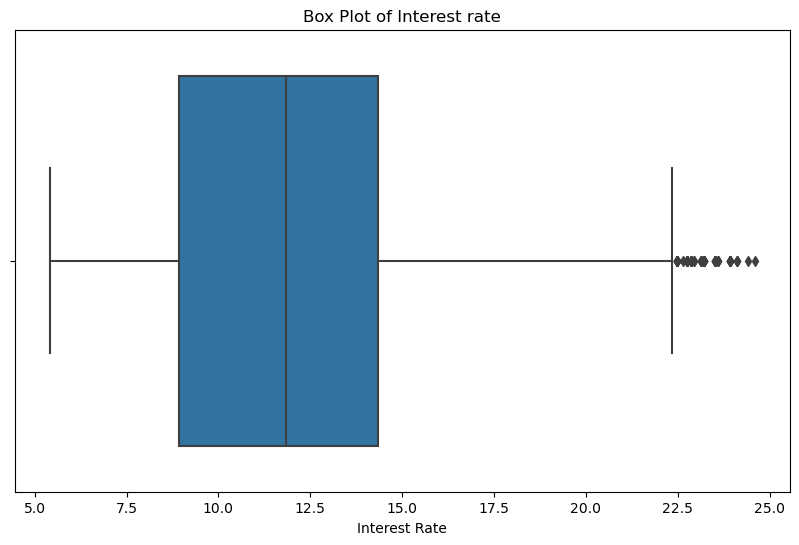

In [34]:
# Plotting Box Plot for int_rate
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['int_rate'])
plt.title('Box Plot of Interest rate')
plt.xlabel('Interest Rate')
plt.show()

In [35]:
# Calculating wiskers to remove outliers
q1=df.int_rate.quantile(0.25)
q3=df.int_rate.quantile(0.75)
iqr=q3-q1
lower_wisk=q1-1.5*iqr
higher_wisk=q3+1.5*iqr
print(lower_wisk)
print(higher_wisk)

0.8249999999999993
22.465


In [36]:
#Removing outliers by using higher wisk value
df = df[df.int_rate < higher_wisk]
df.shape

(37369, 20)

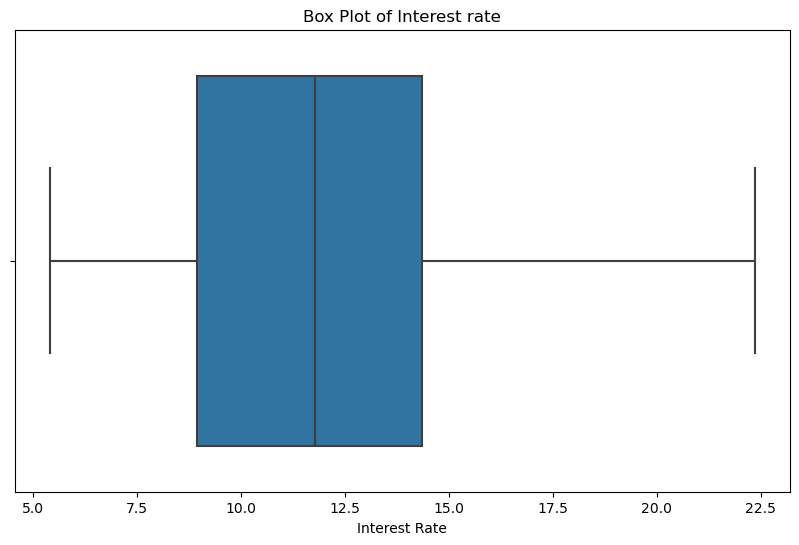

In [37]:
# Plotting Box Plot for int_rate
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['int_rate'])
plt.title('Box Plot of Interest rate')
plt.xlabel('Interest Rate')
plt.show()

C:\Users\Shipra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


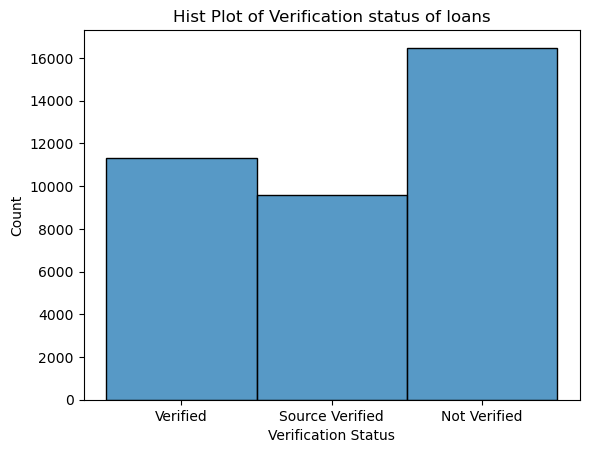

In [38]:
sns.histplot(df.verification_status)
plt.title('Hist Plot of Verification status of loans')
plt.xlabel('Verification Status')
plt.show()

C:\Users\Shipra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


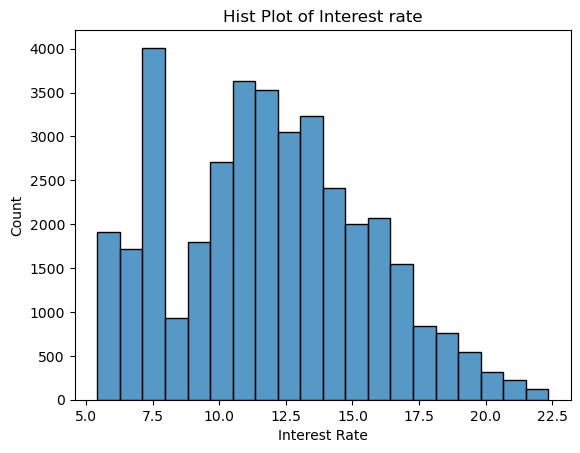

In [39]:
sns.histplot(df.int_rate, bins=20)
plt.title('Hist Plot of Interest rate')
plt.xlabel('Interest Rate')
plt.show()

C:\Users\Shipra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


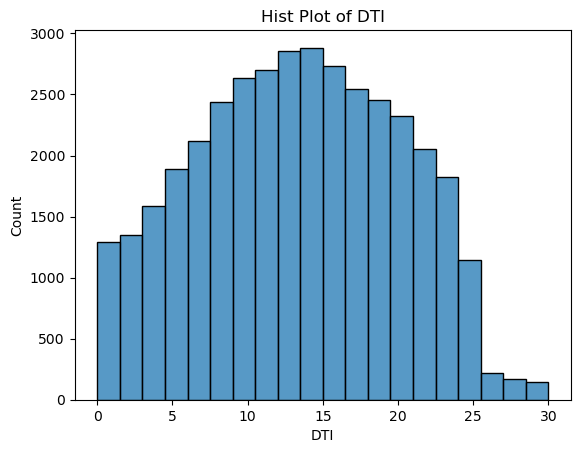

In [40]:
sns.histplot(df.dti, bins=20)
plt.title('Hist Plot of DTI')
plt.xlabel('DTI')
plt.show()

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37369 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    37369 non-null  int64  
 1   member_id             37369 non-null  int64  
 2   loan_amnt             37369 non-null  int64  
 3   funded_amnt           37369 non-null  int64  
 4   funded_amnt_inv       37369 non-null  float64
 5   term                  37369 non-null  object 
 6   int_rate              37369 non-null  float64
 7   installment           37369 non-null  float64
 8   grade                 37369 non-null  object 
 9   sub_grade             37369 non-null  object 
 10  emp_length            37369 non-null  object 
 11  home_ownership        37369 non-null  object 
 12  annual_inc            37369 non-null  float64
 13  verification_status   37369 non-null  object 
 14  issue_d               37369 non-null  object 
 15  loan_status           37

In [42]:
charged_off_data = df[df["loan_status"] == "Charged Off"]
charged_off_data.shape

(5127, 20)

C:\Users\Shipra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


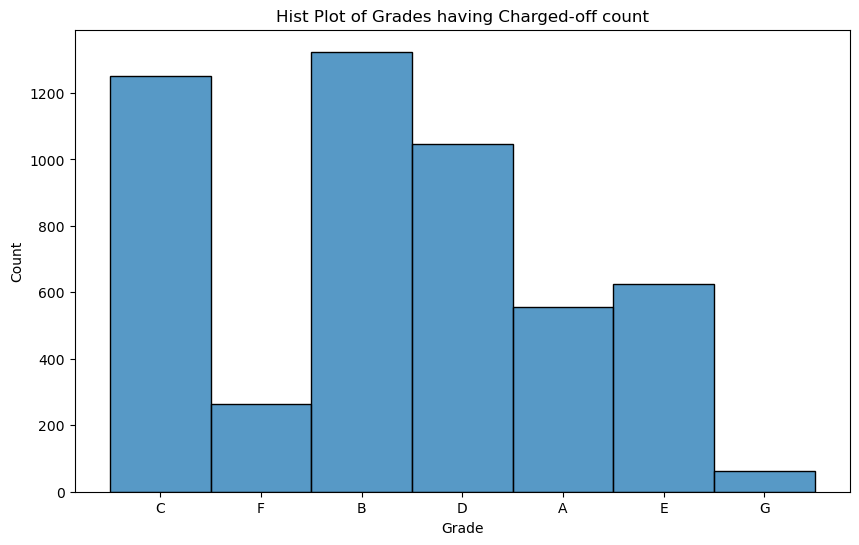

In [43]:
plt.figure(figsize=(10, 6))
sns.histplot(charged_off_data.grade)
plt.title('Hist Plot of Grades having Charged-off count')
plt.xlabel('Grade')
#plt.xticks(rotation=90)
plt.show()

C:\Users\Shipra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


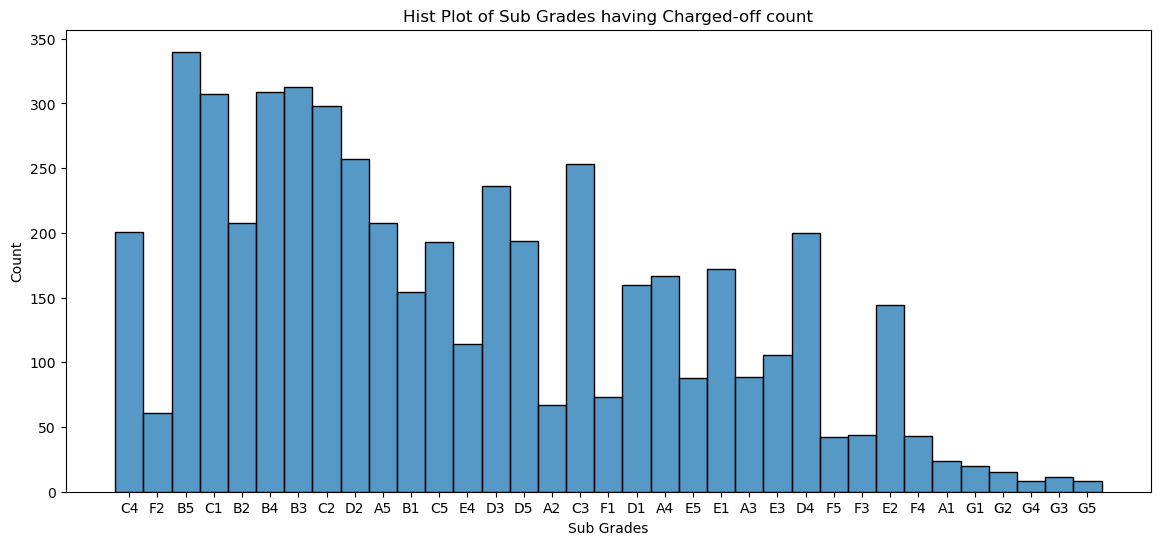

In [44]:
plt.figure(figsize=(14, 6))
sns.histplot(charged_off_data.sub_grade)
plt.title('Hist Plot of Sub Grades having Charged-off count')
plt.xlabel('Sub Grades')
#plt.xticks(rotation=90)
plt.show()

C:\Users\Shipra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


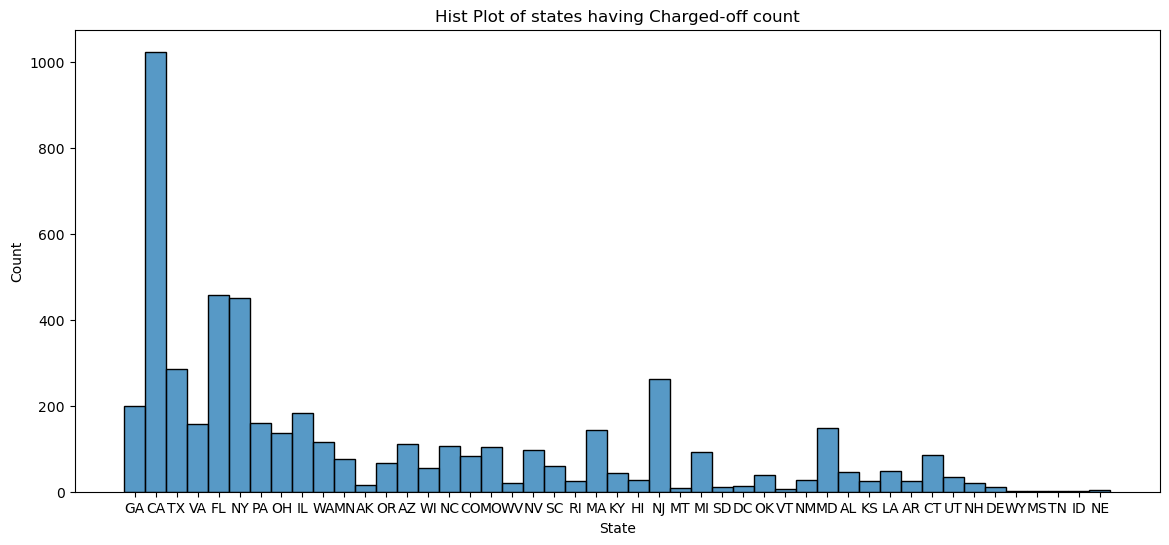

In [55]:
plt.figure(figsize=(14, 6))
sns.histplot(charged_off_data.addr_state)
plt.title('Hist Plot of states having Charged-off count')
plt.xlabel('State')
plt.show()

# Bivariate Analysis

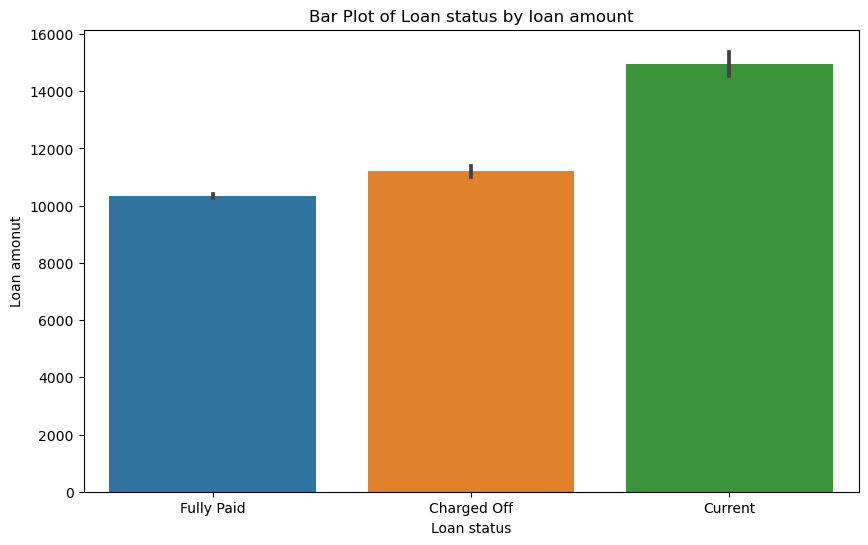

In [46]:
# Plotting Bar Plot for loan status and loan amonut
plt.figure(figsize=(10, 6))
sns.barplot(x='loan_status', y='loan_amnt', data=df)
plt.title('Bar Plot of Loan status by loan amount')
plt.xlabel('Loan status')
plt.ylabel('Loan amonut')
plt.show()

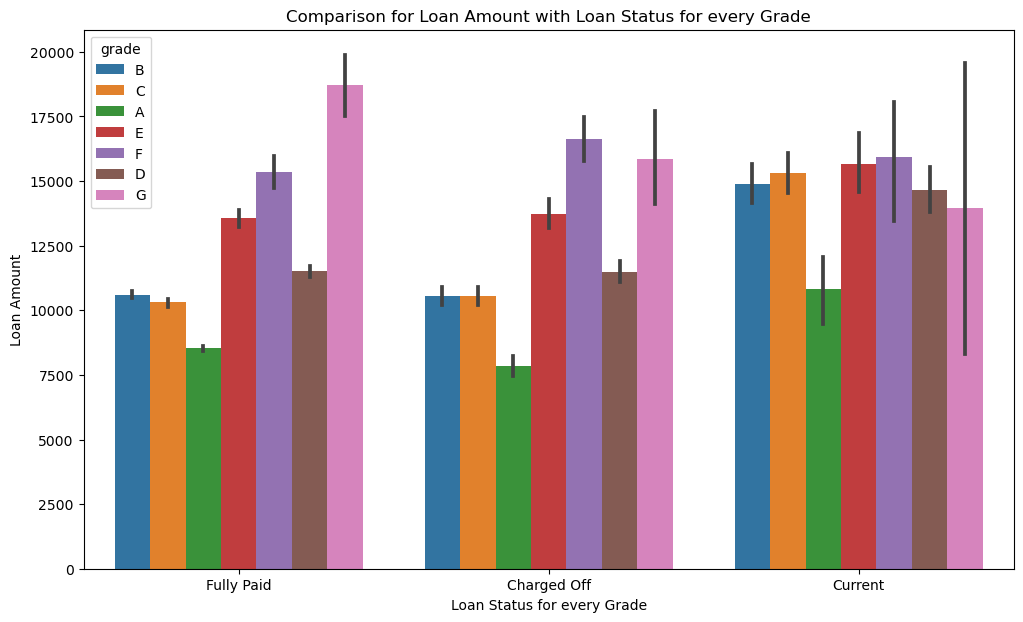

In [47]:
plt.figure(figsize=[12,7])
sns.barplot(data=df, x="loan_status", y="loan_amnt", hue="grade")
plt.title('Comparison for Loan Amount with Loan Status for every Grade')
plt.xlabel('Loan Status for every Grade')
plt.ylabel('Loan Amount')
plt.show()

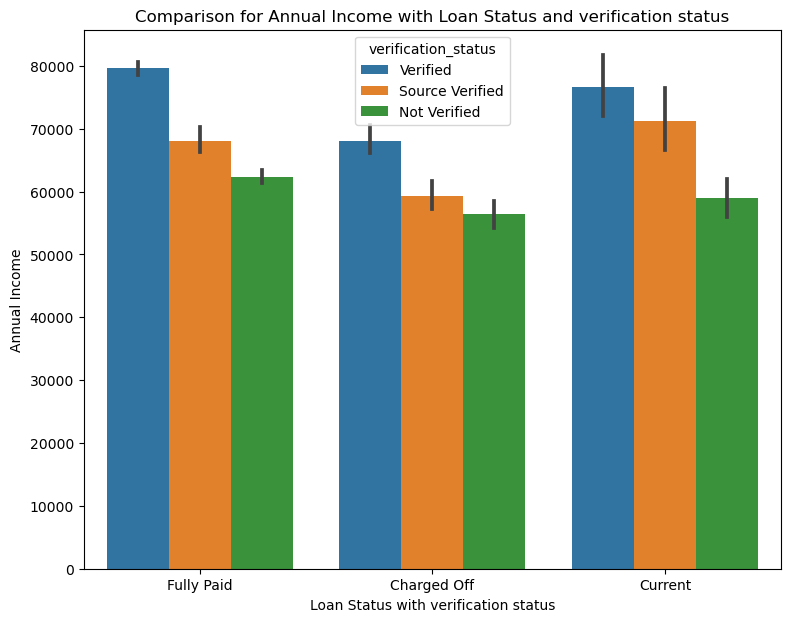

In [48]:
plt.figure(figsize=[9,7])
sns.barplot(data=df, x="loan_status", y="annual_inc", hue="verification_status")
plt.title('Comparison for Annual Income with Loan Status and verification status')
plt.xlabel('Loan Status with verification status')
plt.ylabel('Annual Income')
plt.show()

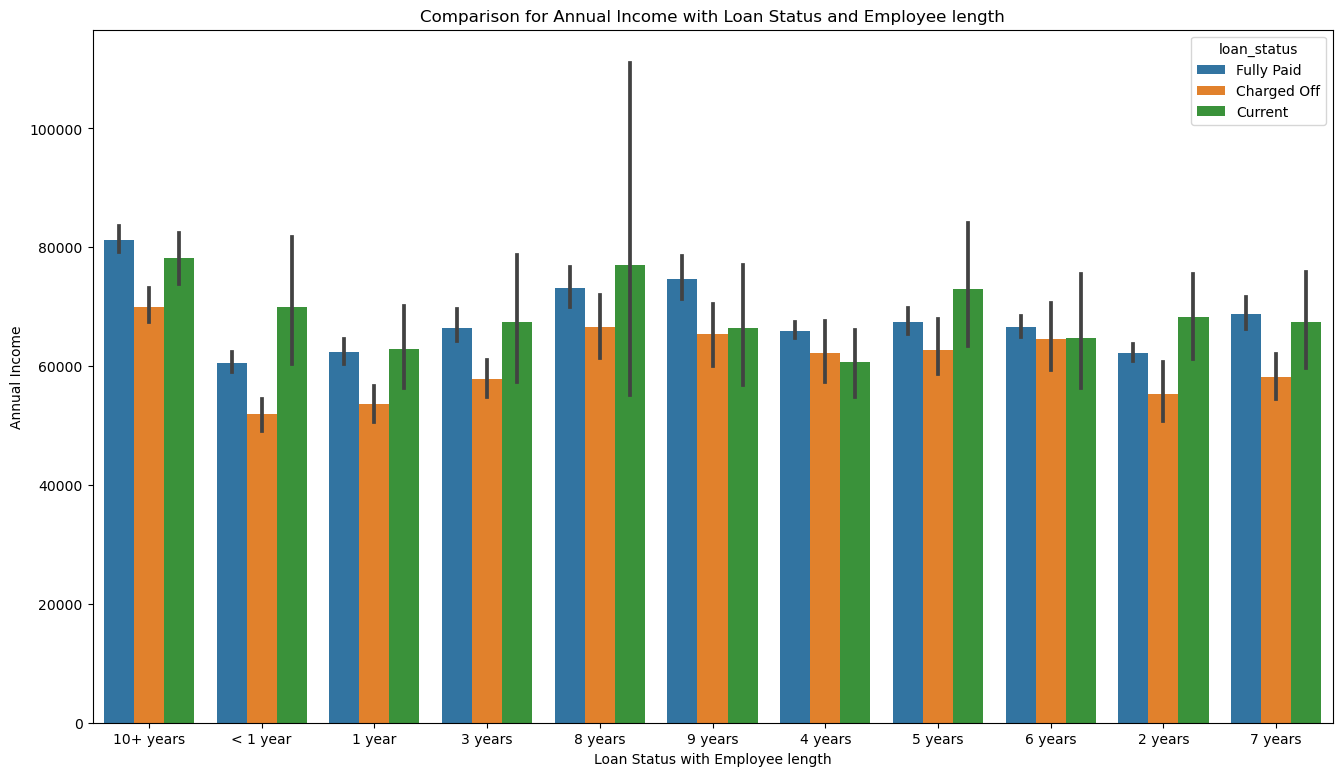

In [49]:
plt.figure(figsize=[16,9])
sns.barplot(data=df, x="emp_length", y="annual_inc", hue="loan_status")
plt.title('Comparison for Annual Income with Loan Status and Employee length')
plt.xlabel('Loan Status with Employee length')
plt.ylabel('Annual Income')
plt.show()

In [50]:
df.home_ownership.value_counts()

home_ownership
RENT        18151
MORTGAGE    16345
OWN          2772
OTHER          98
NONE            3
Name: count, dtype: int64

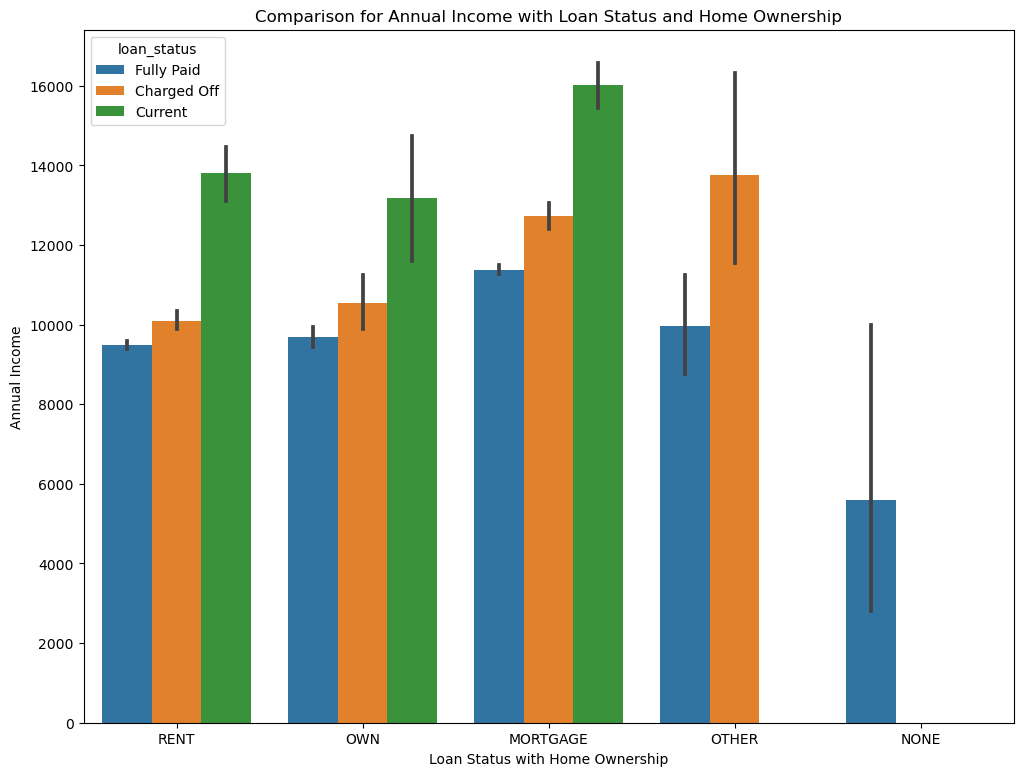

In [51]:
plt.figure(figsize=[12,9])
sns.barplot(data=df, x="home_ownership", y="loan_amnt", hue="loan_status")
plt.title('Comparison for Annual Income with Loan Status and Home Ownership')
plt.xlabel('Loan Status with Home Ownership')
plt.ylabel('Annual Income')
plt.show()

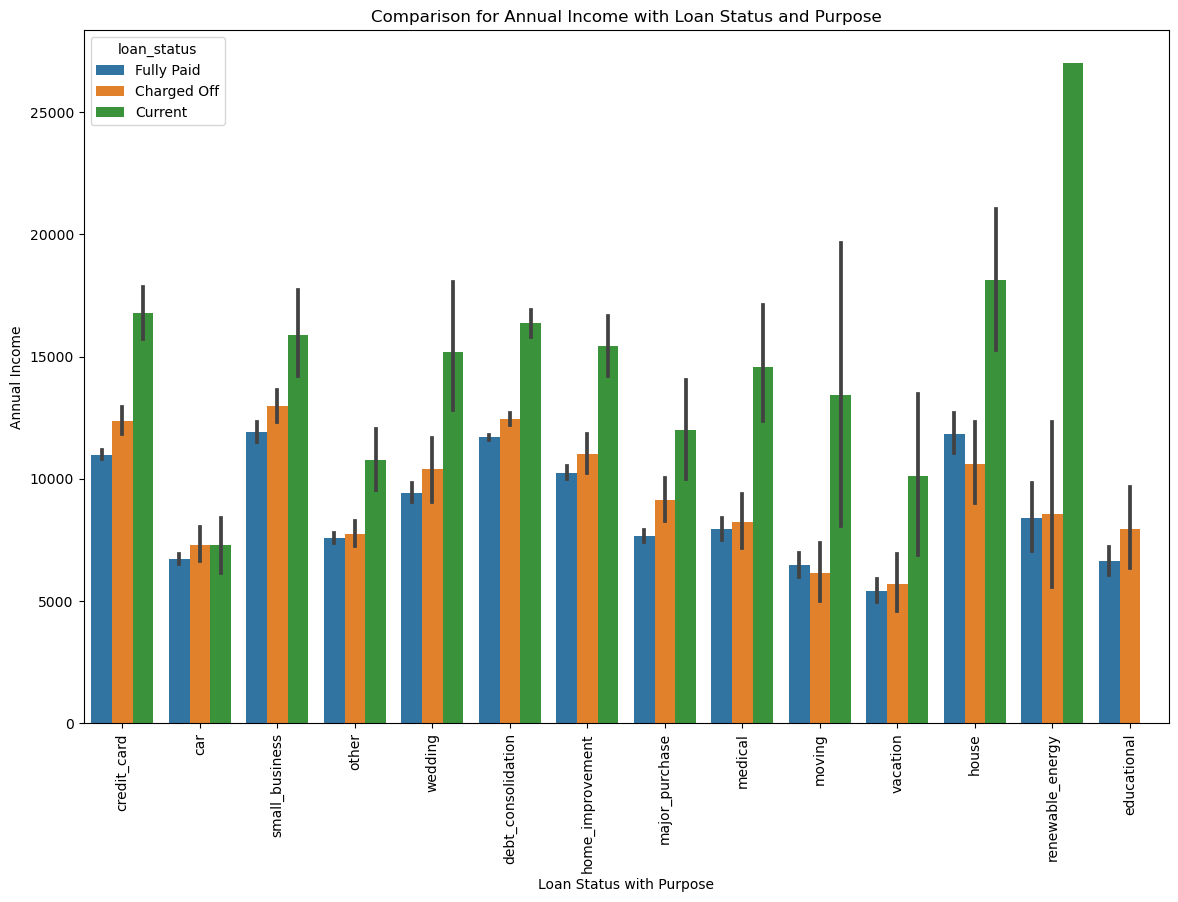

In [52]:
plt.figure(figsize=[14,9])
sns.barplot(data=df, x="purpose", y="loan_amnt", hue="loan_status")
plt.title('Comparison for Annual Income with Loan Status and Purpose')
plt.xlabel('Loan Status with Purpose')
plt.xticks(rotation=90)
plt.ylabel('Annual Income')
plt.show()

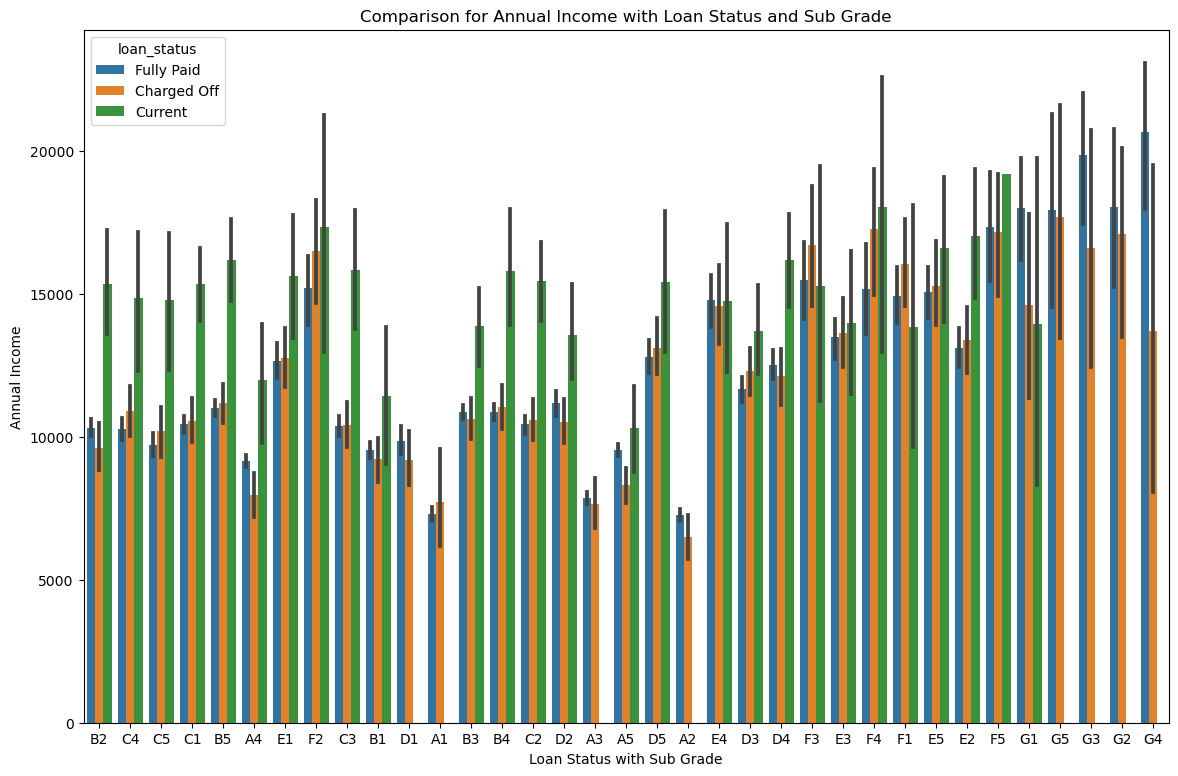

In [53]:
plt.figure(figsize=[14,9])
sns.barplot(data=df, x="sub_grade", y="loan_amnt", hue="loan_status")
plt.title('Comparison for Annual Income with Loan Status and Sub Grade')
plt.xlabel('Loan Status with Sub Grade')
plt.ylabel('Annual Income')
plt.show()